In [85]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sb
from scipy.stats import multivariate_normal
from plot_utils import plotContourNormal, Dirichlet, draw_pdf_contours, plotContourTruncatedNormal
import seaborn as sns
import tensorflow as tf
from efn_util import drawPoissonCounts, setup_IO
from plot_util import exptrend, sattrend, load_V1_events
import scipy.io as sio
from families import family_from_str

matplotlib.rcParams['xtick.direction'] = 'out'
matplotlib.rcParams['ytick.direction'] = 'out'

exp_fam = 'lgc';
D = 10;

basedir = '/Users/sbittner/Documents/efn/';
dir_str = exp_fam;

fam_class = family_from_str(exp_fam);
family = fam_class(D);

T_s = .02;
K = 100;
M = 1000;
TIF_flow_type = 'PlanarFlowLayer'; 
nlayers = 20;
flow_dict = {'latent_dynamics':None, \
             'TIF_flow_type':TIF_flow_type, \
             'repeats':nlayers};
param_net_hps = {'L':4};
stochastic_eta = True;
give_hint = True
rs = 0;

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [86]:
monkey = 1;
SNR_thresh = 1.5;
FR_thresh = 1.0;
events = load_V1_events(monkey, SNR_thresh, FR_thresh);

In [87]:
def load_NF_posterior_counts_spikes(savedir, respdir, events):
    fname = savedir + 'results.npz';
    try:
        npzfile = np.load(fname);
    except:
        print('issue reading %s' % fname);
    # Get posterior
    _X = npzfile['X'];   
   
    # get spikes
    params = npzfile['params'][()];
    neuron = params['neuron'];
    ori = params['ori'];
    print('neuron %d, ori %d' % (neuron, ori));
    spikes = events[neuron-1,ori-1,:];
    
    # get counts
    fname = respdir + 'spike_counts_neuron%d_ori%d.mat' % (neuron, ori);
    M = sio.loadmat(fname);
    counts = M['x'];
    return _X, counts, spikes;

def cut_trailing_spikes(events, D, T_s):
    ntrials = events.shape[0];
    spikes = [];
    t_end = D*T_s;
    for i in range(ntrials):
        _event_i = events[i];
        _event_i = [0.0] + _event_i[_event_i < t_end].tolist();
        spikes.append(_event_i);
    return spikes
    
    


neuron 46, ori 7
MLE estimate
[0.15  0.26  0.225 0.205 0.125 0.12  0.125 0.105 0.2   0.275]


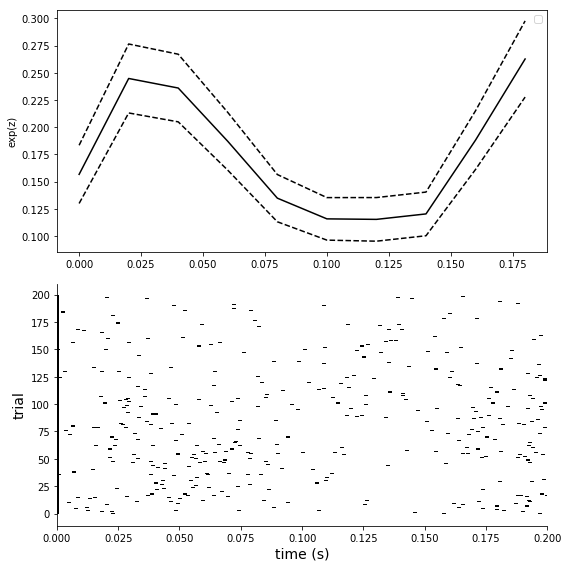

In [88]:
if (exp_fam == 'lgc'):
    ds = 3;
    
    dist_info = {'dist_seed':ds};
    savedir = basedir + setup_IO(family, 'NF1', dir_str, 'eta', K, M, flow_dict, param_net_hps, \
                                             stochastic_eta, give_hint, rs, dist_info);
    respdir = '/Users/sbittner/Documents/efn/data/responses/';
    _X, counts, _events = load_NF_posterior_counts_spikes(savedir, respdir, events);
    spikes = cut_trailing_spikes(_events, D, T_s);

    exp_X = np.exp(_X);
    z_mean = np.mean(exp_X[0,:,:,0], 0);
    z_std = np.std(exp_X[0,:,:,0], 0);

    print("MLE estimate");
    print(np.mean(counts,0)[:D]);

    fontsize= 14;
    plt.figure(figsize=(8,8));
    plt.subplot(2,1,1);

    t = np.linspace(0,(D-1)*T_s, D);
    plt.plot(t,z_mean + z_std, 'k--');
    plt.plot(t,z_mean, 'k');
    plt.plot(t,z_mean - z_std, 'k--');
    plt.ylabel('exp(z)');
    plt.legend('')

    plt.subplot(2,1,2);
    plt.eventplot(np.array(spikes), colors='k', orientation='horizontal', linewidths=4);
    plt.xlabel('time (s)', fontsize=fontsize);
    plt.ylabel('trial', fontsize=fontsize);
    plt.xlim([0.0,D*T_s]);
    ax = plt.gca();
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    plt.tight_layout();
    plt.show();

In [89]:
if (exp_fam == 'tnp'):
    ds = 3;
    
    dist_info = {'dist_seed':ds};
    savedir = basedir + setup_IO(family, 'NF1', dir_str, 'eta', K, M, flow_dict, param_net_hps, \
                                             stochastic_eta, give_hint, rs, dist_info);
    respdir = '/Users/sbittner/Documents/efn/data/responses/';
    _X, counts, _events = load_NF_posterior_counts_spikes(savedir, respdir, events);
    print("MLE estimate");
    print(np.mean(counts,0)[:D]);
    spikes = cut_trailing_spikes(_events, D, T_s);

    z_mean = np.mean(_X[0,:,:,0], 0);
    z_std = np.std(_X[0,:,:,0], 0);

    fontsize= 14;
    plt.figure(figsize=(8,8));
    plt.subplot(2,1,1);

    t = np.linspace(0,(D-1)*T_s, D);
    plt.plot(t,z_mean + z_std, 'k--');
    plt.plot(t,z_mean, 'k');
    plt.plot(t,z_mean - z_std, 'k--');
    plt.ylabel('z');
    plt.legend('')

    plt.subplot(2,1,2);
    plt.eventplot(np.array(spikes), colors='k', orientation='horizontal', linewidths=4);
    plt.xlabel('time (s)', fontsize=fontsize);
    plt.ylabel('trial', fontsize=fontsize);
    plt.xlim([0.0,D*T_s]);
    ax = plt.gca();
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    plt.tight_layout();
    plt.show();

In [15]:
print(counts.shape);
print(np.sum(counts,0));
print(3/20)

(200, 50)
[30 52 45 41 25 24 25 21 40 55 47 44 22 12 31 30 37 47 44 35 22 15 21 31
 34 54 52 41 22 20 19 36 37 43 56 26 26 13 20 42 41 51 53 44 28 21 21 37
 36 58]
0.15
